## K-nn classifier

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [4]:
import urllib.request

filepath = "../dataset/"
url = "https://tvml.github.io/ml1920/dataset/"

def get_file(filename,local):
    if local:
        return filepath+filename
    else:
        urllib.request.urlretrieve (url+filename, filename)
        return filename

In [5]:
df = pd.read_csv(get_file('knnClassify3c.csv', False), delimiter=';')
dft = pd.read_csv(get_file('knnClassify3c-test.csv', False), delimiter=';')

In [6]:
x1min=min(min(df.x1),min(dft.x1))
x1max=max(max(df.x1),max(dft.x1))
x2min=min(min(df.x2),min(dft.x2))
x2max=max(max(df.x2),max(dft.x2))

x1min=x1min-(x1max-x1min)/10
x1max=x1max+(x1max-x1min)/10
x2min=x2min-(x2max-x2min)/10
x2max=x2max+(x2max-x2min)/10

classes=[ x for x in df['class'].unique()]
nclasses = len(classes)

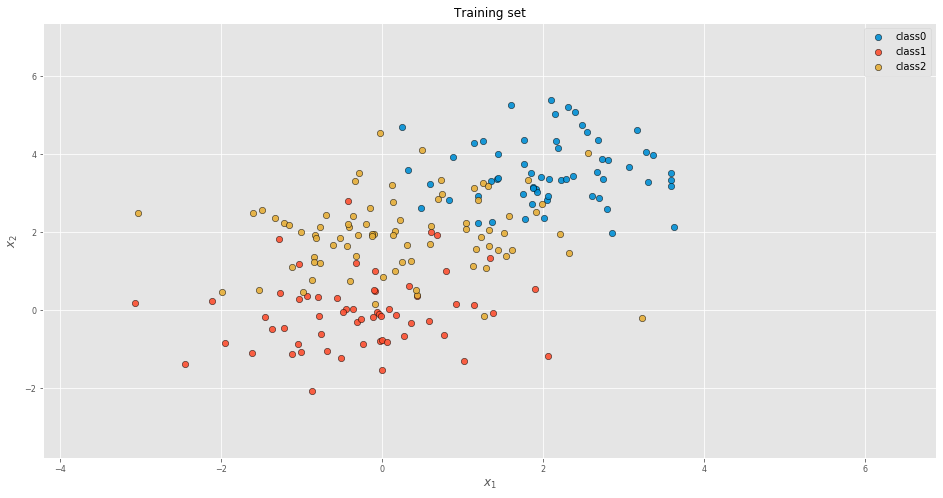

In [7]:
fig = plt.figure(figsize=(16,8))
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
for i, cl in enumerate(classes):
    data = df[df['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.9, label='class'+str(i))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Training set', fontsize=12)
plt.legend()
plt.show()

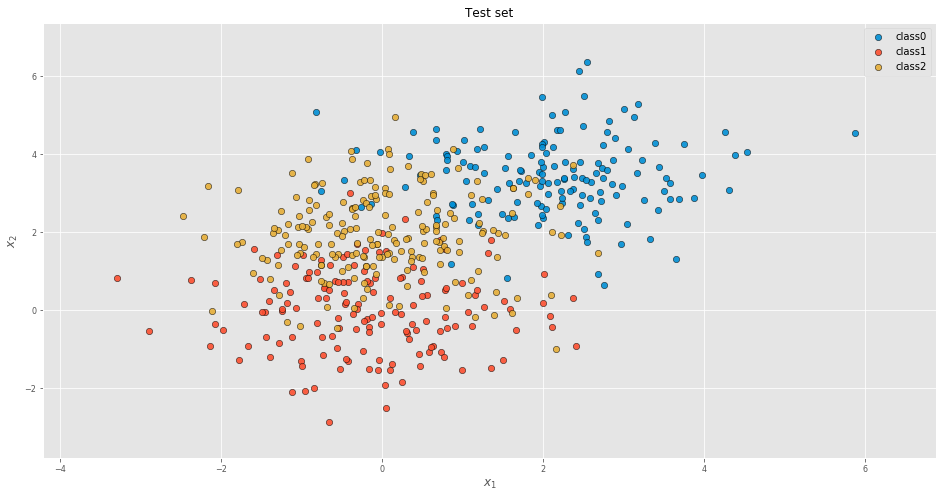

In [8]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
for i, cl in enumerate(classes):
    data = dft[dft['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.9, label='class'+str(i))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Test set', fontsize=12)
plt.legend()
plt.show()

In [9]:
x = np.linspace(x1min,x1max, 1000)
y = np.linspace(x2min,x2max, 1000)

xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]

x_train=df[['x1','x2']]
y_train=df['class']
x_test=dft[['x1','x2']]
y_test=dft['class']

In [10]:
cMap = mcolors.ListedColormap(colors[0:3])

In [11]:
k=3
knn = KNN(n_neighbors=k)
knn.fit(x_train, y_train)
y_predicted = knn.predict(xy)

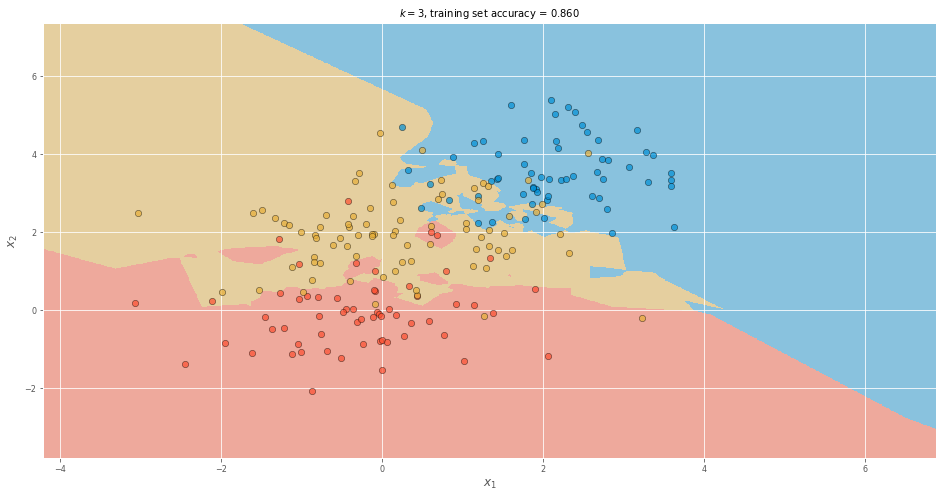

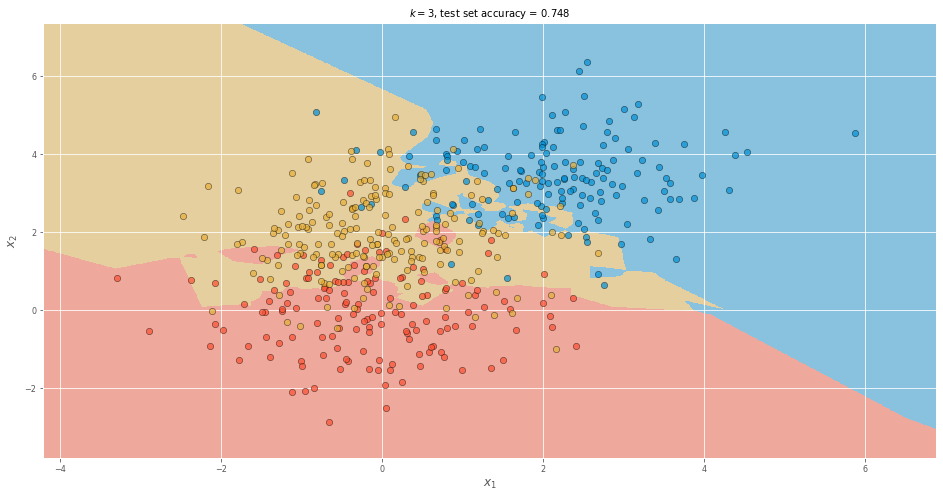

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
plt.imshow(y_predicted.reshape(1000, 1000), origin='lower', extent=(x1min,x1max,x2min,x2max), alpha=.4, cmap=cMap, aspect='auto')
for i, cl in enumerate(classes):
    data = df[df['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.7)
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('$k={0:d}$, training set accuracy = {1:5.3f}'.format(k,knn.score(x_train, y_train)))
plt.show()

fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
plt.imshow(y_predicted.reshape(1000, 1000), origin='lower', extent=(x1min,x1max,x2min,x2max), alpha=.4, cmap=cMap, aspect='auto')
for i, cl in enumerate(classes):
    data = dft[dft['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.7)
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('$k={0:d}$, test set accuracy = {1:5.3f}'.format(k,knn.score(x_test, y_test)))
plt.show()

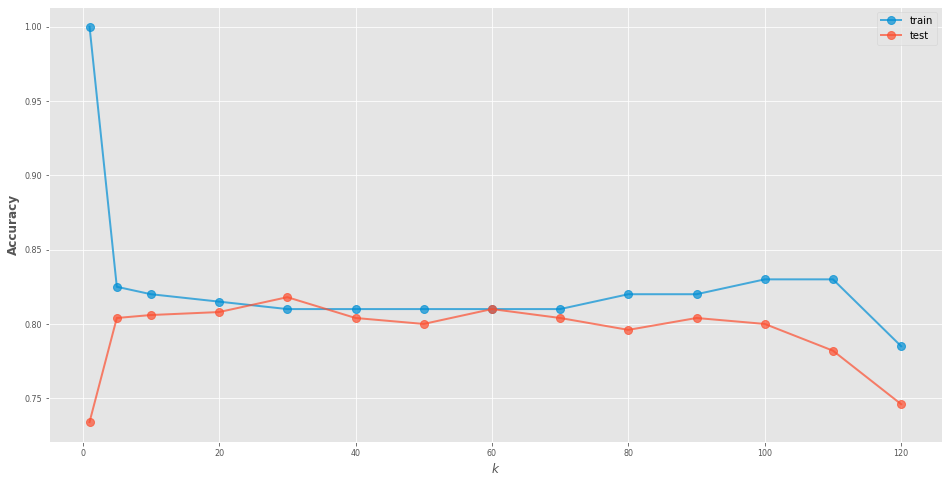

In [13]:
ks = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
train_errs = []
test_errs = []
for k in ks:
    knn = KNN(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_errs.append(knn.score(x_train, y_train))
    test_errs.append(knn.score(x_test, y_test))
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(axis='both', which='major', labelsize=8)
ax.plot(ks, train_errs, '-o', color=colors[0], markersize=8, alpha=.7, label='train')
ax.plot(ks, test_errs, '-o', color=colors[1], markersize=8, alpha=.7, label='test')
plt.legend(fontsize=10)
plt.xlabel('$k$', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

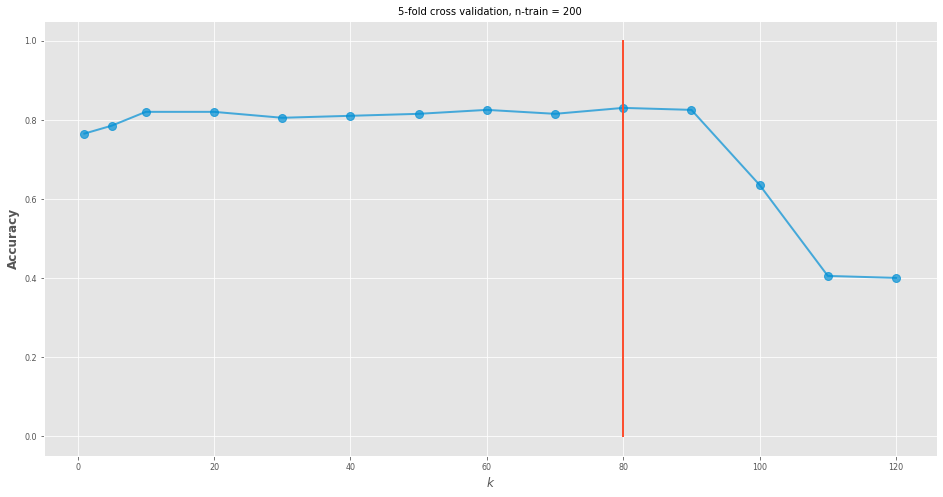

In [14]:
#cross_validate
scores = []
c=5
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=c)
    scores.append(score.mean())
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(axis='both', which='major', labelsize=8)
plt.plot(ks, scores, 'o-', color=colors[0], markersize=8, alpha=.7)
max_k = ks[np.argmax(scores)]
plt.plot([max_k, max_k], [0, 1.0], color=colors[1])
plt.xlabel('$k$', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('{0:d}-fold cross validation, n-train = {1:d}'.format(c,len(x_train)), fontsize=10)
plt.show()